## Regression in Python

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


### Part 1: Linear Regression
Linear Regression is a method to model the relationship between a set of independent variables X (also knowns as explanatory variables, features, predictors) and a dependent variable Y. This method assumes the relationship between each predictor X is linearly related to the dependent variable Y.




## Loading the Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
# Print description of dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
hos = pd.DataFrame(housing.data)
hos.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Exploring the Dataset

hos.describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# Adding the column names

hos.columns = housing.feature_names
hos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


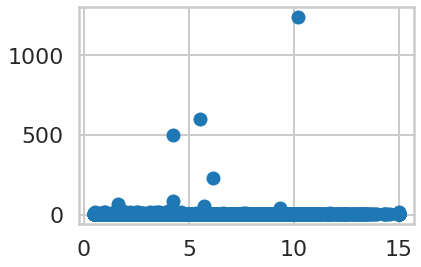

In [ ]:
plt.scatter(hos.MedInc, hos.AveOccup)
plt.show()

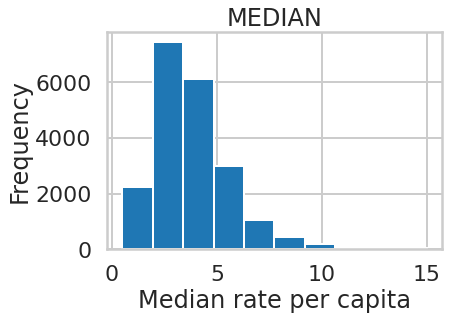

In [ ]:
plt.hist(hos.MedInc)
plt.title("MEDIAN")
plt.xlabel("Median rate per capita")
plt.ylabel("Frequency")
plt.show()

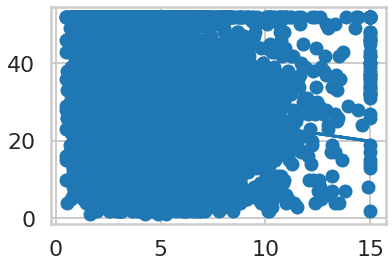

In [ ]:
x = hos.MedInc
y = hos.HouseAge

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
m = ols('HouseAge ~ AveBedrms',hos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               HouseAge   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           4.78e-29
Time:                        17:36:44   Log-Likelihood:                -81496.
No. Observations:               20640   AIC:                         1.630e+05
Df Residuals:                   20638   BIC:                         1.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9038      0.220    140.356      0.0

Text(0.5, 1.0, 'Relationship between Original Prices and Fitted Values')

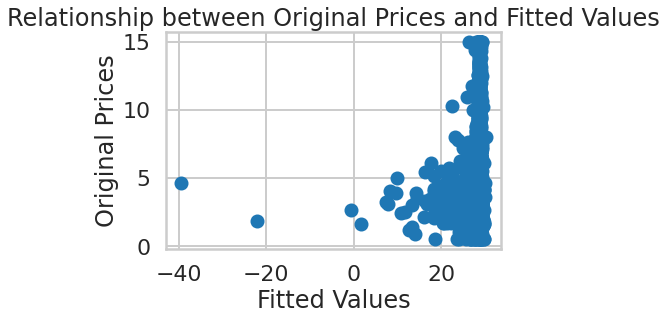

In [ ]:
plt.scatter(m.fittedvalues, hos.MedInc)
plt.xlabel("Fitted Values")
plt.ylabel("Original Prices")
plt.title("Relationship between Original Prices and Fitted Values")

### Part 2: Training and Test Data Sets

In [ ]:
from sklearn.linear_model import LinearRegression
X = hos.drop('MedInc', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = hos.MedInc[:-50]
Y_test = hos.MedInc[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20590, 7)
(50, 7)
(20590,)
(50,)


In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lm3.predict(X_test)

array([1.84405131, 1.12443329, 1.57349887, 3.76596505, 4.0629104 ,
       3.12838534, 3.25272245, 2.68567012, 2.03905082, 2.56367267,
       2.25881304, 1.97781716, 1.4748041 , 1.94139407, 2.51218687,
       2.1814942 , 2.60883778, 2.05265997, 1.9837821 , 2.36121538,
       2.12567671, 1.7287497 , 2.5838066 , 2.43270204, 2.70421885,
       2.86058634, 1.8957978 , 2.9907269 , 3.32553624, 3.65357838,
       2.3935556 , 3.07523142, 2.94555586, 2.40580484, 3.56668949,
       4.03457015, 3.83290081, 3.49042696, 2.68388422, 2.9580432 ,
       2.99365193, 3.16981977, 3.40940418, 2.78674585, 3.81208706,
       1.64034695, 2.07288671, 2.0739085 , 2.02389673, 1.98963027])

Text(0, 0.5, 'Residuals')

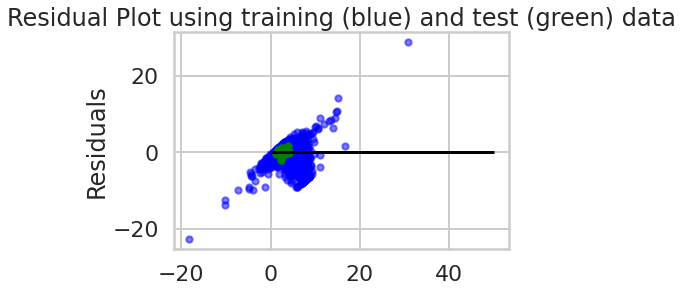

In [ ]:
plt.scatter(lm3.predict(X_train), lm3.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm3.predict(X_test), lm3.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')